# Задание 2.

**NB. Все упражнения ниже нужно делать без использования циклов Python в явном (`while`, `for`) и неявном виде (list comprehension, `map`, `reduce` и пр)**

Задания по манипуляциям с массивами чаще всего решаются в одно/два выражения. 

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
sns.set_theme()

np.random.seed(42)
A = np.random.randint(0, 100, size=(200, 50))
A

array([[51, 92, 14, ..., 20, 72, 38],
       [17,  3, 88, ..., 81, 52, 23],
       [25, 88, 59, ...,  4, 89, 13],
       ...,
       [38, 34, 48, ..., 10, 61, 35],
       [38, 52, 89, ..., 26, 14, 94],
       [78, 32, 19, ..., 79, 18,  7]], shape=(200, 50), dtype=int32)

# Задание 2.1 (2 балла)

Сгенерируйте новый массив, в котором столбцы массива `A` переставлены в случайном порядке

In [2]:
np.random.permutation(A.T).T

array([[50, 91,  1, ..., 88, 38, 61],
       [77, 73, 49, ..., 62, 23, 94],
       [64, 61, 34, ..., 11, 13, 43],
       ...,
       [11, 19,  8, ..., 68, 35,  9],
       [ 1, 97, 92, ...,  6, 94, 88],
       [22, 51, 88, ..., 38,  7, 41]], shape=(200, 50), dtype=int32)

In [3]:
A[np.random.permutation(np.arange(A.shape[0]))]

array([[57, 15, 71, ..., 25, 36, 84],
       [48, 16, 97, ..., 57, 27, 25],
       [46,  3,  6, ..., 18,  7, 25],
       ...,
       [97, 20, 29, ..., 46, 85, 22],
       [70, 45, 30, ..., 78, 28, 25],
       [78, 74,  7, ..., 23, 37, 34]], shape=(200, 50), dtype=int32)

# Задание 2.2 (4 балла)

Сгенерируйте новый массив, который содержит только те строки массива `A`, в которых: 
- сумма элементов по четным столбцам (индексы $0, 2, \ldots$) больше среднего значения (по всему массиву) суммы элементов по нечетным столбцам (индексы $1, 3, \ldots$) 

In [4]:
A[np.where(A[::2].sum(axis=1) > A[1::2].sum(axis=1).mean())[0] * 2]

array([[51, 92, 14, ..., 20, 72, 38],
       [ 8, 61, 36, ..., 97, 69, 85],
       [75, 25, 15, ..., 11, 49, 34],
       ...,
       [23, 64, 17, ..., 52,  3, 81],
       [53,  5, 39, ..., 10, 47,  7],
       [38, 52, 89, ..., 26, 14, 94]], shape=(50, 50), dtype=int32)

# Задача 2.3 (3 балла)

Найдите индекс строки массива `A`, в которой разница между максимальным и минимальным элементом максимальна

In [5]:
np.argmax(A.max(axis=0) - A.min(axis=0))

np.int64(0)

# Задание 2.4 (5 баллов)

Сгенерируйте массив той же размерности, что и `A`, но в котором каждый элемент заменен на его порядковый номер (начиная с 1) в отсортированном по возрастанию массиве из элементов `A`

Если `A` выглядит так:
$$
\begin{pmatrix}
12 & 14\\
1 & 2
\end{pmatrix}
$$
то результат должен быть
$$
\begin{pmatrix}
3 & 4\\
1 & 2
\end{pmatrix}
$$

*Tip: рассмотрите возможность неоднократного применения [argsort()](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.argsort.html)*

In [6]:
np.argsort(np.argsort(A.flatten())).reshape(A.shape) + 1

array([[5146, 9204, 1378, ..., 2016, 7310, 3846],
       [1750,  307, 8894, ..., 8107, 5322, 2398],
       [2553, 8861, 6062, ...,  420, 8979, 1332],
       ...,
       [3907, 3457, 4835, ..., 1018, 6172, 3582],
       [3922, 5242, 8949, ..., 2729, 1391, 9472],
       [7888, 3294, 2014, ..., 7931, 1810,  681]], shape=(200, 50))

# Задание 2.5 (2 балла)

Примените $\min-\max$ - нормализацию к строкам массива `A`. То есть нужно получить новый массивы, в каждой строке которого максимальный элементы равен $1$, минимальный - $0$. 

In [7]:
(A - A.min(axis=0)) / (A.max(axis=0) - A.min(axis=0))

array([[0.51515152, 0.92929293, 0.14141414, ..., 0.2020202 , 0.72727273,
        0.38383838],
       [0.17171717, 0.03030303, 0.88888889, ..., 0.81818182, 0.52525253,
        0.23232323],
       [0.25252525, 0.88888889, 0.5959596 , ..., 0.04040404, 0.8989899 ,
        0.13131313],
       ...,
       [0.38383838, 0.34343434, 0.48484848, ..., 0.1010101 , 0.61616162,
        0.35353535],
       [0.38383838, 0.52525253, 0.8989899 , ..., 0.26262626, 0.14141414,
        0.94949495],
       [0.78787879, 0.32323232, 0.19191919, ..., 0.7979798 , 0.18181818,
        0.07070707]], shape=(200, 50))

# Задание 2.6 (2 балла)

Сгенерируйте новый трехмерный массив, размерности $10 \times 200 \times 50$. Подмассивы по нулевой оси должны состоять из элементов `A`, умноженных на $1 - 10$ соответственно

In [8]:
(np.repeat(A.reshape(*A.shape, 1), repeats=10, axis=2) * np.arange(1, 11)).transpose(2, 0, 1)

array([[[ 51,  92,  14, ...,  20,  72,  38],
        [ 17,   3,  88, ...,  81,  52,  23],
        [ 25,  88,  59, ...,   4,  89,  13],
        ...,
        [ 38,  34,  48, ...,  10,  61,  35],
        [ 38,  52,  89, ...,  26,  14,  94],
        [ 78,  32,  19, ...,  79,  18,   7]],

       [[102, 184,  28, ...,  40, 144,  76],
        [ 34,   6, 176, ..., 162, 104,  46],
        [ 50, 176, 118, ...,   8, 178,  26],
        ...,
        [ 76,  68,  96, ...,  20, 122,  70],
        [ 76, 104, 178, ...,  52,  28, 188],
        [156,  64,  38, ..., 158,  36,  14]],

       [[153, 276,  42, ...,  60, 216, 114],
        [ 51,   9, 264, ..., 243, 156,  69],
        [ 75, 264, 177, ...,  12, 267,  39],
        ...,
        [114, 102, 144, ...,  30, 183, 105],
        [114, 156, 267, ...,  78,  42, 282],
        [234,  96,  57, ..., 237,  54,  21]],

       ...,

       [[408, 736, 112, ..., 160, 576, 304],
        [136,  24, 704, ..., 648, 416, 184],
        [200, 704, 472, ...,  32, 712, 104

# Задание 2.7 (2 балла)

Создайте новый массив, такой же размерности, как и `A`, в котором сначала сгруппированы четные столбцы `A`, потом  нечетные. Используйте [np.concat()](https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html) 

In [9]:
np.concat([A[:, ::2], A[:, 1::2]], axis=1)

array([[51, 14, 60, ..., 50, 20, 38],
       [17, 88, 13, ..., 84, 81, 23],
       [25, 59, 28, ...,  2,  4, 13],
       ...,
       [38, 48, 37, ..., 48, 10, 35],
       [38, 89, 55, ..., 27, 26, 94],
       [78, 19, 11, ..., 15, 79,  7]], shape=(200, 50), dtype=int32)

# Задание 2.8 (2 балла)

Посчитайте количество строк массива `A`, в который все элементы больше 5. Используйте [np.all()](https://numpy.org/doc/stable/reference/generated/numpy.all.html) 

In [10]:
np.sum(A.min(axis=0) > 5)

np.int64(0)

In [11]:
np.sum((A > 5).all(axis=0))

np.int64(0)

# Задание 2.9 (2 балла)

Поделите массив `A` горизонтально на 10 частей и создайте новый массив размерности $20 \times 50$, который является средним этих частей. Используйте [np.split()](https://numpy.org/doc/stable/reference/generated/numpy.split.html)

In [12]:
np.mean(np.split(A, 10, axis=0), axis=0)

array([[49.8, 52.9, 43.9, 53.1, 42.8, 34.2, 56.2, 56.2, 30.6, 44.7, 57.2,
        56.5, 32.3, 66.8, 36.4, 37.5, 45.1, 45.2, 43.6, 47.6, 40.3, 39.8,
        46.1, 39.3, 39.9, 57.8, 50.2, 50.2, 41.9, 53.2, 47.8, 47.1, 34.6,
        59.7, 39. , 42.2, 45.4, 54.7, 54.6, 45.5, 58.3, 38.1, 34.4, 61.5,
        55.1, 55.4, 36.2, 56.1, 55.8, 45.3],
       [45.2, 46.7, 38.2, 47. , 52.5, 33.1, 56.3, 46.6, 44.6, 46.9, 50.7,
        48.9, 62.1, 54.1, 41.7, 46.4, 43.8, 44.3, 66.7, 44.3, 40.4, 40.3,
        62.4, 28. , 52.9, 46.3, 50.4, 59.7, 56.9, 44.6, 46.3, 42.8, 50.3,
        36. , 50.2, 43.5, 32. , 54.7, 39.1, 45.9, 43.4, 43.7, 52.8, 41.3,
        46.1, 58.6, 64.4, 49.6, 43. , 33. ],
       [46.5, 52.5, 47.1, 44.7, 50.3, 50.4, 55.2, 54.7, 59. , 50.2, 59.2,
        53.2, 52.9, 43.4, 52.4, 46.7, 56.4, 48. , 43.9, 62.4, 49.5, 52.8,
        43. , 39.5, 34.1, 17.1, 43.8, 60.1, 42.1, 31. , 59.9, 33.5, 34.8,
        50.9, 64.4, 62.2, 53.4, 49.6, 45.3, 61.7, 52.9, 49.5, 61.4, 77.9,
        43.1, 37.3, 54

# Задание 2.10 (4 балла)

"Разверните" массив `A` в одномерный массив. Оставьте в нём только уникальные элементы в том же порядке, в котором они встречаются в массиве. Используйте [np.unique()](https://numpy.org/doc/stable/reference/generated/numpy.unique.html)

In [13]:
A.reshape(-1)[np.sort(np.unique(A.reshape(-1), return_index=True)[1])]

array([51, 92, 14, 71, 60, 20, 82, 86, 74, 87, 99, 23,  2, 21, 52,  1, 29,
       37, 63, 59, 32, 75, 57, 88, 48, 90, 58, 41, 91, 79, 61, 46, 50, 54,
        6, 72, 38, 17,  3, 13,  8, 89, 83, 70, 43,  7, 34, 77, 80, 35, 49,
        5, 53, 62, 33, 73, 94, 47, 39, 84, 81, 25, 40, 28, 44, 64,  0, 10,
        4, 27, 11, 22, 36, 98, 85, 26, 78, 76, 95, 93, 42, 12, 31, 65, 56,
       96, 69, 55, 18, 67, 16, 68, 97, 15, 19, 66, 30, 24, 45,  9],
      dtype=int32)

# Задание 2.11 (3 балла)

Создайте одномерный массив размерности $200$, в котором каждый элемент - евклидово расстояние между соответствующей строкой `A` и "усредненной" строкой матрицы `A`

In [14]:
np.sum((A - A.mean(axis=0)) ** 2, axis=1)

array([38761.1116, 45882.9916, 48131.7516, 40667.3516, 42749.6816,
       50375.1916, 38858.6516, 42287.3316, 36984.4216, 47342.3416,
       46904.8916, 40597.4316, 44107.8016, 39591.6216, 40241.1816,
       40389.1616, 47349.6416, 41254.0216, 42577.6116, 48834.9616,
       41865.3516, 48924.5016, 39355.6516, 39426.7816, 39955.0316,
       32796.1516, 42211.1116, 44206.1816, 50406.4016, 39329.7716,
       35274.7616, 50328.8616, 45082.0116, 31501.9716, 53287.2616,
       39661.6816, 45598.5516, 43677.3816, 41059.3816, 42430.2116,
       43148.9116, 43533.1816, 48642.1816, 38537.9616, 34297.0016,
       36745.6616, 49308.7216, 38474.0916, 40370.7116, 35416.1716,
       42126.7316, 45324.2816, 37521.2216, 50221.6916, 51839.9416,
       35896.7316, 52134.7016, 40114.0116, 45558.0916, 54238.8916,
       39239.7016, 39497.9416, 38129.0316, 37133.3216, 41403.2316,
       44453.7416, 49746.4716, 37939.8616, 45227.4716, 35319.9716,
       36536.1316, 41074.8616, 32127.8316, 40790.7616, 28939.8

# Задание 2.12 (2 балла)

Создайте новый массив, который состоит из элементов `A`, измененных по следующим правилам:
- если элемент меньше $50$, то он умножается на $2$
- в противном случае он умножается на $3$

Используйте [np.where()](https://numpy.org/doc/stable/reference/generated/numpy.where.html)

In [15]:
B = A.copy()
B[np.where(A >= 50)] *= 2
B += A
B

array([[153, 276,  28, ...,  40, 216,  76],
       [ 34,   6, 264, ..., 243, 156,  46],
       [ 50, 264, 177, ...,   8, 267,  26],
       ...,
       [ 76,  68,  96, ...,  20, 183,  70],
       [ 76, 156, 267, ...,  52,  28, 282],
       [234,  64,  38, ..., 237,  36,  14]], shape=(200, 50), dtype=int32)

# Задание 2.13 (4 балла)

Разверните массив `A` в одномерный массив. Создайте три новых массива, подсчитав скользящие средние по окнам $3$, $5$, $10$. Найдите сумму этих массивов, выровнив их размерности нулями справа

*Tip: реализуйте функцию, которая считает скользящее среднее. Используйте [np.cumsum()](https://numpy.org/doc/stable/reference/generated/numpy.cumsum.html) или [np.convolve()](https://numpy.org/doc/stable/reference/generated/numpy.convolve.html)*

In [16]:
conv3 = np.convolve(A.flatten(), np.full(3, 1/3), mode="valid")
conv5 = np.convolve(A.flatten(), np.full(5, .2), mode="valid")
conv10 = np.convolve(A.flatten(), np.full(10, .1), mode="valid")

In [17]:
np.concat([conv10, np.zeros(7)]) + np.concat([conv5, np.zeros(2)]) + conv3

array([172.33333333, 176.4       , 164.43333333, ...,  63.66666667,
        37.66666667,  34.66666667], shape=(9998,))

# Задание 2.14 (5 баллов)

Постройте график функции $$f(x) = (5  \sin(2x) - \cos^2(x) - 1 + |x^3| - x^2) / (x^2 + 1)$$  

и производной от этой функции.  Найдите минимум (например, c помощью `scipy`) и обозначьте его на графике. На этой же оси постройте графики скользящего среднего этой функции с окном $1$, $2$, $5$.

In [18]:
def f(x):
    return (5 * np.sin(2*x) - np.cos(x)**2 - 1 + abs(x ** 3) - x**2)/(x**2 + 1)


xs = np.linspace(-10, 10, 20001)
ys = f(xs)
ders = np.gradient(ys, xs)

x_min = scipy.optimize.minimize(f, x0=xs[np.argmin(ys)])

mean1 = np.convolve(ys, np.ones(1001) / 1001, mode="valid")[4500:-4500]
mean2 = np.convolve(ys, np.ones(2001) / 2001, mode="valid")[4000:-4000]
mean5 = np.convolve(ys, np.ones(5001) / 5001, mode="valid")[2500:-2500]

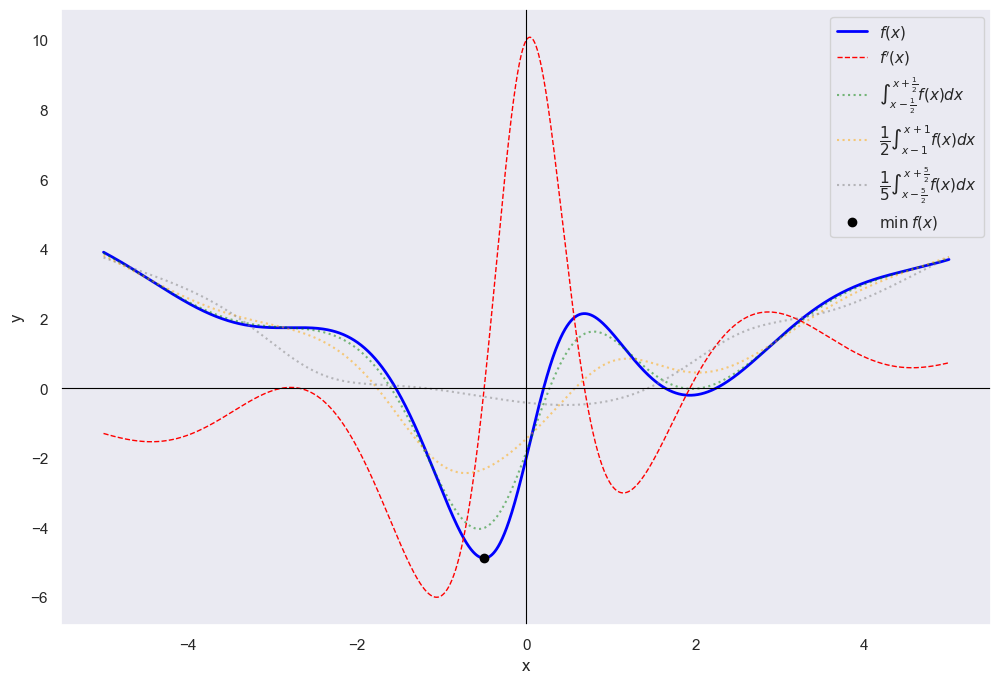

In [19]:
plt.figure(figsize=(12, 8))
plt.plot(xs[5000:-5000], ys[5000:-5000], label="$f(x)$", color="blue", linewidth=2)
plt.plot(xs[5000:-5000], ders[5000:-5000], label="$f'(x)$", color="red", linewidth=1, linestyle='--')

plt.plot(xs[5000:-5000], mean1, label="$\\int_{x-\\frac{1}{2}}^{x+\\frac{1}{2}}f(x)dx$", color="green", alpha=.5, linestyle=":")
plt.plot(xs[5000:-5000], mean2, label="$\\dfrac{1}{2}\\int_{x-1}^{x+1}f(x)dx$", color="orange", alpha=.5, linestyle=":")
plt.plot(xs[5000:-5000], mean5, label="$\\dfrac{1}{5}\\int_{x-\\frac{5}{2}}^{x+\\frac{5}{2}}f(x)dx$", color="gray", alpha=.5, linestyle=":")

plt.scatter(x_min.x, x_min.fun, color="black", zorder=2, label="$\\min\\:f(x)$")


plt.axhline(y=0, color='black', linewidth=0.8, linestyle='-')
plt.axvline(x=0, color='black', linewidth=0.8, linestyle='-')
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.legend()
plt.show()

# Задание 2.15 (6 баллов)

Есть следующий алгоритм семплинирования, на вход функции подается вектор из целых положительных чисел и число семплов.

In [20]:
from typing import List 

def sample(x: List[int], c: int) -> List[int]:
    assert len(x) > 0
    
    s = np.sum(x)
    res = []
    for _ in range(c):
        val = s * np.random.random()
        cur, idx = 0, 0        
        while cur + x[idx] <= val:
            cur += x[idx]
            idx += 1
            
        res.append(idx)
    return res


sample([50, 3, 1, 7, 20], 5)

[2, 4, 4, 0, 0]

Реализуйте данный алгоритм более оптимальным способом на массивах `numpy`, без использования циклов. Проверьте корректность и идентичность алгоритмов семплирования с помощью статистических тестов.

In [21]:
def np_sample(x: List[int], c: int) -> np.ndarray:
    assert x

    cs = np.cumsum(x)

    return cs.shape[0] - np.sum(np.repeat(cs.reshape(-1, 1), c, axis=1) > np.random.rand(1, c) * cs[-1], axis=0)

In [22]:
%timeit sample([50, 3, 1, 7, 20], 1_000)
%timeit np_sample([50, 3, 1, 7, 20], 1_000)

2.57 ms ± 18.2 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)
52.4 μs ± 433 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [23]:
def compare(samples1, samples2):
    values = np.unique(np.concat([samples1, samples2]))
    p1 = np.array([np.mean(samples1 == v) for v in values])
    p2 = np.array([np.mean(samples2 == v) for v in values])
    
    freq1 = [np.sum(samples1 == v) for v in values]
    freq2 = [np.sum(samples2 == v) for v in values]
    _, p_value, _, _ = scipy.stats.chi2_contingency([freq1, freq2])
    
    total_variation_distance = 0.5 * np.sum(np.abs(p1 - p2))

    print(p1, p2)
    print(p_value, total_variation_distance)
    
    return p_value > 0.05 and total_variation_distance < 0.1


compare(np.array(sample([50, 3, 1, 7, 20], 10_000)), np_sample([50, 3, 1, 7, 20], 10_000))

[0.6179 0.0393 0.0117 0.0847 0.2464] [0.6225 0.0369 0.0129 0.0877 0.24  ]
0.578784836438731 0.008800000000000033


np.True_

# Задание 2.16 (3 балла)

Есть следующий алгоритм "случайного блуждания"

In [24]:
import random 

def walk(n: int):
    cur_position = 0
    for i in range(n):
        cur_position += random.choice([-3, -1, 0, 2, 3])

    return cur_position

walk(10_000)

1831

Реализуйте более эффективную версию с помощью `numpy`, сравните производительность (используя, например, magic `timeit`). Воспользовавшись [kdeplot()](https://seaborn.pydata.org/generated/seaborn.kdeplot.html) или аналогами, постройте график распределения значений `walk(10_000)` на каком-то разумном числе запусков. 

In [25]:
def np_walk(n: int):
    return np.sum(np.random.choice([-3, -1, 0, 2, 3], size=n))

In [26]:
%timeit walk(10_000)
%timeit np_walk(10_000)

4.24 ms ± 25.5 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)
168 μs ± 15.5 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


<Axes: ylabel='Density'>

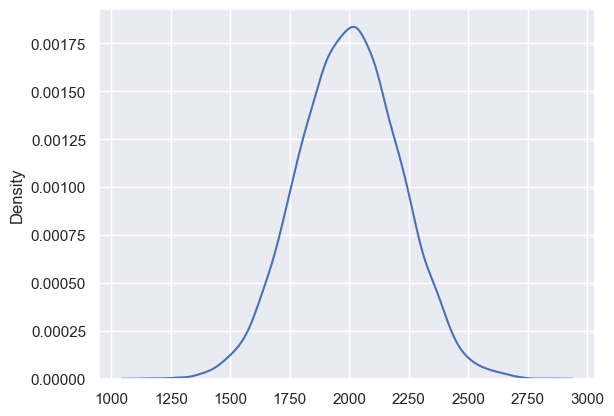

In [27]:
stats = [np_walk(10_000) for _ in range(10000)]
sns.kdeplot(stats)

# Задание 2.17 (3 балла)

Имеется функция, которая проделывает достаточно странные манипуляции с массивом `numpy`

In [28]:
import numpy.typing as npt

def strange_conv(a: npt.NDArray[np.float64]) -> np.float64:
    x_len = a.shape[0]
    y_len = a.shape[1]

    t = 1.
    for y in range(y_len - 5):
        for x in range(x_len - 3):
            c = 1.5 * a[y+1, x+2] - a[y+5, x+3] * a[y, x] + 0.2 * a[y+4, x]
            t = 0.2 * t + 0.8 * c

    return t


a = np.random.random((10000, 10000))
strange_conv(a)


np.float64(-0.25261572123011566)

Оптимизируйте данную функцию с помощью (2 на выбор):
- [Numba](https://numba.pydata.org)
- `Cython` (+1 балл)
- [Taichi](https://github.com/taichi-dev/taichi) (+1 балл)
- `Pythran `[[1]](https://pythran.readthedocs.io/en/latest/), [[2]](https://serge-sans-paille.github.io/pythran-stories/pythran-tutorial.html) (+1 балл)

Сравните производительность.